In [4]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import re

In [5]:
df = pd.read_csv('Data2.csv')
df.head()

,Id,Age,Title,Review Text
0,0,33,NaN,Absolutely wonderful - silky and sexy and comf...
1,1,34,NaN,Love this dress! it's sooo pretty. i happene...
2,2,60,Some major design flaws,I had such high hopes for this dress and reall...
3,3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,4,47,Flattering shirt,This shirt is very flattering to all due to th...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           23486 non-null  int64 
 1   Age          23486 non-null  int64 
 2   Title        19676 non-null  object
 3   Review Text  22641 non-null  object
dtypes: int64(2), object(2)
memory usage: 734.1+ KB


In [7]:
df = df.dropna(subset=['Title', 'Review Text'], how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22642 entries, 0 to 23485
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           22642 non-null  int64 
 1   Age          22642 non-null  int64 
 2   Title        19676 non-null  object
 3   Review Text  22641 non-null  object
dtypes: int64(2), object(2)
memory usage: 884.5+ KB


In [8]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['Title'] = df['Title'].apply(clean_text)
df['Review Text'] = df['Review Text'].apply(clean_text)

In [9]:
df['Review'] = df['Title'] + ' ' + df['Review Text']

In [10]:
df = df.drop(['Id', 'Title', 'Review Text'], axis=1)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = [word for word in str(text).split() if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

df['Review'] = df['Review'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Age,Review
0,33,absolutely wonderful silky sexy comfortable
1,34,love dress sooo pretty happened find store im ...
2,60,major design flaw high hope dress really wante...
3,50,favorite buy love love love jumpsuit fun flirt...
4,47,flattering shirt shirt flattering due adjustab...


In [12]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_TextBlob'] = df['Review'].apply(analyze_sentiment)

df.head()

,Age,Review,Sentiment_TextBlob
0,33,absolutely wonderful silky sexy comfortable,0.633333
1,34,love dress sooo pretty happened find store im ...,0.318750
2,60,major design flaw high hope dress really wante...,0.081439
3,50,favorite buy love love love jumpsuit fun flirt...,0.500000
4,47,flattering shirt shirt flattering due adjustab...,0.458333


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df['Sentiment_Vander_Lexicon'] = df['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
df.head(10)

,Age,Review,Sentiment_TextBlob,Sentiment_Vander_Lexicon
0,33,absolutely wonderful silky sexy comfortable,0.633333,0.8991
1,34,love dress sooo pretty happened find store im ...,0.318750,0.9710
2,60,major design flaw high hope dress really wante...,0.081439,0.9081
3,50,favorite buy love love love jumpsuit fun flirt...,0.500000,0.9587
4,47,flattering shirt shirt flattering due adjustab...,0.458333,0.9274
5,49,petite love tracy reese dress one petite foot ...,0.150000,0.9153
6,39,cagrcoal shimmer fun aded basket hte last mint...,0.120500,0.8173
7,39,shimmer surprisingly go lot ordered carbon sto...,0.259135,0.7089
8,24,flattering love dress usually get x run little...,-0.046875,0.8316
9,34,fun dress im lb ordered petite make sure lengt...,0.219841,0.9732


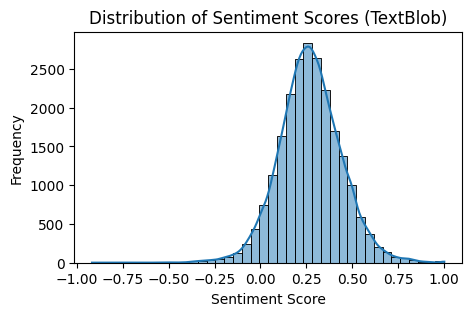

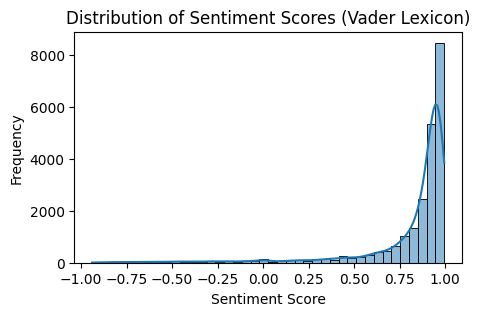

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.histplot(df['Sentiment_TextBlob'], bins=40, kde=True) # Using TextBlob sentiment
plt.title('Distribution of Sentiment Scores (TextBlob)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(5,3))
sns.histplot(df['Sentiment_Vander_Lexicon'], bins=40, kde=True) # Using Vader Lexicon sentiment
plt.title('Distribution of Sentiment Scores (Vader Lexicon)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['Sentiment_Bins'] = pd.cut(df['Sentiment_TextBlob'], bins=[-1, -0.5, 0.09, 0.6, 1], labels=['Very Negative', 'Negative', 'Positive', 'Very Positive'])
df.head()

,Age,Review,Sentiment_TextBlob,Sentiment_Vander_Lexicon,Sentiment_Bins
0,33,absolutely wonderful silky sexy comfortable,0.633333,0.8991,Very Positive
1,34,love dress sooo pretty happened find store im ...,0.318750,0.9710,Positive
2,60,major design flaw high hope dress really wante...,0.081439,0.9081,Negative
3,50,favorite buy love love love jumpsuit fun flirt...,0.500000,0.9587,Positive
4,47,flattering shirt shirt flattering due adjustab...,0.458333,0.9274,Positive


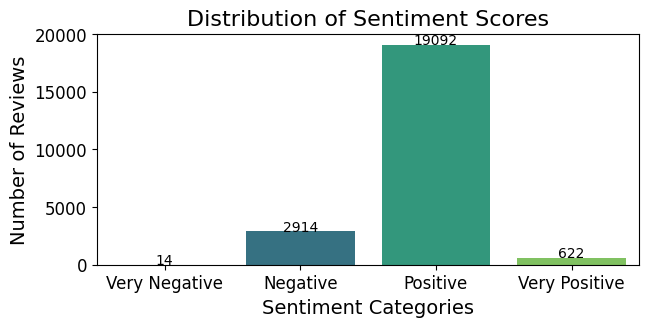

In [17]:
sentiment_counts = df['Sentiment_Bins'].value_counts().sort_index()

plt.figure(figsize=(7, 3))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis", hue=sentiment_counts.index, legend=False)
for i, count in enumerate(sentiment_counts.values):
  ax.text(i, count + 0.5, str(count), ha='center', fontsize=10, color='black')
plt.title("Distribution of Sentiment Scores", fontsize=16)
plt.xlabel("Sentiment Categories", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
df['Review_Length'] = df['Review'].apply(len)
df.groupby('Sentiment_Bins')['Review_Length'].mean()

<ipython-input-18-f157403ff526>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Sentiment_Bins')['Review_Length'].mean()


,Review_Length
Sentiment_Bins,
Very Negative,84.357143
Negative,207.300618
Positive,197.525246
Very Positive,97.382637


<ipython-input-19-d78528c28dc5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Review_Length'], shade=True)


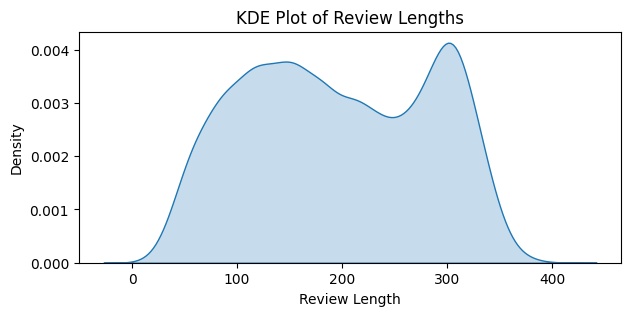

In [19]:
plt.figure(figsize=(7, 3))
sns.kdeplot(df['Review_Length'], shade=True)
plt.title('KDE Plot of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Density')
plt.show()

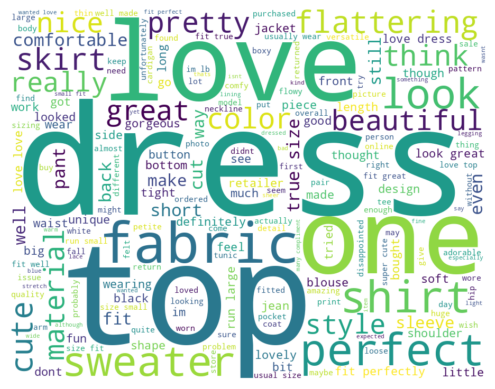

In [20]:
from wordcloud import WordCloud

text = ' '.join(df['Review'])
wordcloud = WordCloud(width=900, height=700, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
age_bins = [20, 30, 40, 50, 60, 70]
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=["20s", "30s", "40s", "50s", "60s"])
sentiment_by_age = df.groupby('Age_Group')['Sentiment_TextBlob'].mean()
sentiment_by_age

<ipython-input-21-4b32eb041443>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_age = df.groupby('Age_Group')['Sentiment_TextBlob'].mean()


,Sentiment_TextBlob
Age_Group,
20s,0.273254
30s,0.267422
40s,0.267263
50s,0.274342
60s,0.273241


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['Review'])
vectorizer.get_feature_names_out()

array(['beautiful', 'color', 'cute', 'dress', 'fabric', 'fit',
       'flattering', 'great', 'im', 'like', 'little', 'look', 'love',
       'ordered', 'perfect', 'really', 'size', 'small', 'soft', 'wear'],
      dtype=object)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

negative_reviews = df[df['Sentiment_Bins'] == 'Negative']['Review']

vectorizer = TfidfVectorizer(max_features=30, stop_words='english')
X = vectorizer.fit_transform(negative_reviews)

top_terms = vectorizer.get_feature_names_out()
tfidf_scores = X.toarray().mean(axis=0)

import pandas as pd
terms_df = pd.DataFrame({'Term': top_terms, 'Score': tfidf_scores})
terms_df = terms_df.sort_values(by='Score', ascending=False)

terms_df

,Term,Score
4,dress,0.142496
8,like,0.114827
21,size,0.109340
22,small,0.109164
11,look,0.091581
5,fabric,0.084598
1,color,0.082294
29,wear,0.081107
7,im,0.080383
6,fit,0.079503


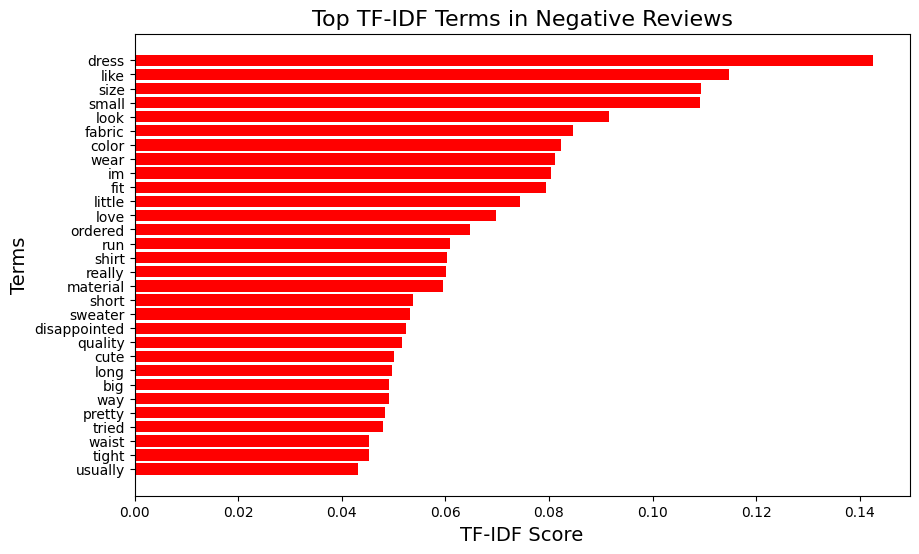

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(terms_df['Term'], terms_df['Score'], color='red')
plt.title('Top TF-IDF Terms in Negative Reviews', fontsize=16)
plt.xlabel('TF-IDF Score', fontsize=14)
plt.ylabel('Terms', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

In [25]:
df['Age'].describe()

,Age
count,22642.000000
mean,43.279790
std,12.327023
min,18.000000
25%,34.000000
50%,41.000000
75%,52.000000
max,99.000000


<Axes: >

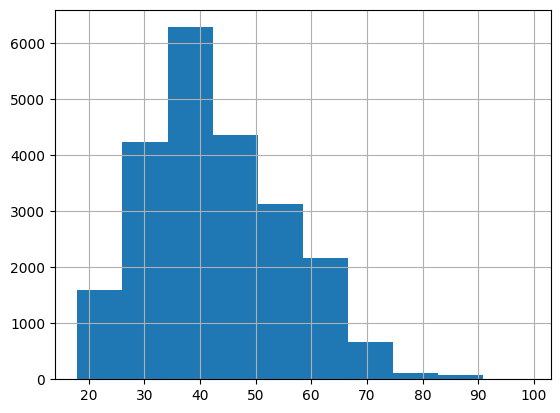

In [26]:
df['Age'].hist(bins=10)

In [27]:
sentiment_distribution = df['Sentiment_Bins'].value_counts(normalize=True) * 100
sentiment_distribution

,proportion
Sentiment_Bins,
Positive,84.321173
Negative,12.869888
Very Positive,2.747107
Very Negative,0.061832


In [30]:
from scipy.stats import f_oneway

age_groups = [group['Sentiment_TextBlob'] for _, group in df.groupby('Age_Group', observed=False)]
f_stat, p_value = f_oneway(*age_groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.8585444621031584, P-value: 0.11468830184848912


F-statistic:

The F-statistic is 1.8585. This measures the ratio of variability between the group means to the variability within the groups. A higher F-statistic indicates more significant differences between groups.

P-value:

The p-value is 0.1147. Since this value is greater than 0.05, we fail to reject the null hypothesis at the 5% significance level.
Interpretation: There is no statistically significant difference in sentiment scores across age groups. In other words, age does not appear to influence sentiment significantly.

In [31]:
df.head()

,Age,Review,Sentiment_TextBlob,Sentiment_Vander_Lexicon,Sentiment_Bins,Review_Length,Age_Group
0,33,absolutely wonderful silky sexy comfortable,0.633333,0.8991,Very Positive,43,30s
1,34,love dress sooo pretty happened find store im ...,0.318750,0.9710,Positive,180,30s
2,60,major design flaw high hope dress really wante...,0.081439,0.9081,Negative,319,50s
3,50,favorite buy love love love jumpsuit fun flirt...,0.500000,0.9587,Positive,101,40s
4,47,flattering shirt shirt flattering due adjustab...,0.458333,0.9274,Positive,127,40s


In [33]:
product_keywords = {
    'Dress': r'\bdress(es)?\b',
    'Shirt': r'\bshirt(s)?\b',
    'Sweater': r'\bsweater(s)?\b',
    'Pants': r'\bpant(s)?\b|\btrouser(s)?\b',
    'Jumpsuit': r'\bjumpsuit(s)?\b'
}

def identify_product(review):
    for product, pattern in product_keywords.items():
        if re.search(pattern, review, flags=re.IGNORECASE):
            return product
    return 'Unknown'

df['Product_Type'] = df['Review'].apply(identify_product)

df['Product_Type'].value_counts()

,count
Product_Type,
Unknown,11045
Dress,6457
Shirt,1937
Sweater,1694
Pants,1361
Jumpsuit,148


In [35]:
from scipy.stats import f_oneway

df2 = df[df['Product_Type']!='Unknown']
f_stat, p = f_oneway(*[group['Sentiment_TextBlob'] for _, group in df2.groupby('Product_Type')])
print(f"F-statistic: {f_stat}, P-value: {p}")

F-statistic: 11.769340848213393, P-value: 1.5351313351205596e-09


The ANOVA test indicates that there is a statistically significant difference in sentiment scores (Sentiment_TextBlob) across product types, given the F-statistic of 11.77 and a p-value of ~1.54e-09. Since the p-value is far below the typical significance threshold (e.g., 0.05), we reject the null hypothesis that the mean sentiment scores are the same across all product types.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene

# Normality test (Shapiro-Wilk)
for product, group in df2.groupby('Product_Type'):
    stat, p = shapiro(group['Sentiment_TextBlob'])
    print(f"{product}: Shapiro-Wilk p-value = {p}")

# Homogeneity of variances test (Levene's test)
stat, p = levene(*[group['Sentiment_TextBlob'] for _, group in df2.groupby('Product_Type')])
print(f"Levene's test p-value = {p}")

Dress: Shapiro-Wilk p-value = 4.1931530688213474e-16
Jumpsuit: Shapiro-Wilk p-value = 0.2508179240697884
Pants: Shapiro-Wilk p-value = 6.245509789084541e-05
Shirt: Shapiro-Wilk p-value = 1.3768601354742407e-09
Sweater: Shapiro-Wilk p-value = 1.9836520119145494e-08
Levene's test p-value = 0.07365739882215513


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6457.
  res = hypotest_fun_out(*samples, **kwds)


1. Shapiro-Wilk Test for Normality
The Shapiro-Wilk test evaluates whether the sentiment scores for each product type follow a normal distribution.

Results:

Dress, Pants, Shirt, and Sweater have p-values < 0.05, meaning their sentiment scores significantly deviate from normality.
Jumpsuit has a p-value > 0.05, indicating normality.
A warning appears for Dress due to a large sample size (N > 5000). With such large samples, even small deviations from normality can result in significant p-values.
Conclusion:

Normality is not satisfied for most product types. ANOVA's robustness to non-normality depends on balanced group sizes and similar variances.
2. Levene's Test for Homogeneity of Variances
Levene's test evaluates whether the variances of sentiment scores across product types are equal.

Results:

The p-value = 0.0736 is greater than 0.05, suggesting that the variances across groups are not significantly different.
Conclusion:

The assumption of homogeneity of variances is satisfied.

In [37]:
def bootstrap_means(data, n_iterations=1000):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return means

# Bootstrap sentiment means for each product type
bootstrap_results = {}
for product, group in df2.groupby('Product_Type'):
    bootstrap_results[product] = bootstrap_means(group['Sentiment_TextBlob'])

# Compare bootstrap distributions
for product, means in bootstrap_results.items():
    print(f"{product}: Mean = {np.mean(means):.3f}, 95% CI = ({np.percentile(means, 2.5):.3f}, {np.percentile(means, 97.5):.3f})")


Dress: Mean = 0.277, 95% CI = (0.273, 0.281)
Jumpsuit: Mean = 0.275, 95% CI = (0.245, 0.304)
Pants: Mean = 0.266, 95% CI = (0.257, 0.274)
Shirt: Mean = 0.248, 95% CI = (0.241, 0.255)
Sweater: Mean = 0.263, 95% CI = (0.255, 0.270)
